In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
#converting data in one hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


#In beginning every review is of different size.
#There are 2 ways of making every review of same size.
#one hot encoding will convert all reviews in same size.


In [5]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
#run any one from listing 3.4,3.5 or 3.6 from book
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [10]:
#Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 57s 4ms/sample - loss: 0.5074 - accuracy: 0.7793 - val_loss: 0.4036 - val_accuracy: 0.8507
Epoch 2/20
15000/15000 [==============================] - 37s 2ms/sample - loss: 0.3004 - accuracy: 0.9031 - val_loss: 0.3039 - val_accuracy: 0.8881
Epoch 3/20
15000/15000 [==============================] - 45s 3ms/sample - loss: 0.2197 - accuracy: 0.9278 - val_loss: 0.2817 - val_accuracy: 0.8878
Epoch 4/20
15000/15000 [==============================] - 7s 455us/sample - loss: 0.1761 - accuracy: 0.9412 - val_loss: 0.2757 - val_accuracy: 0.8903
Epoch 5/20
15000/15000 [==============================] - 6s 409us/sample - loss: 0.1412 - accuracy: 0.9563 - val_loss: 0.2952 - val_accuracy: 0.8811
Epoch 6/20
15000/15000 [==============================] - 6s 394us/sample - loss: 0.1140 - accuracy: 0.9657 - val_loss: 0.3211 - val_accuracy: 0.8792
Epoch 7/20
15000/15000 [=============================

In [18]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

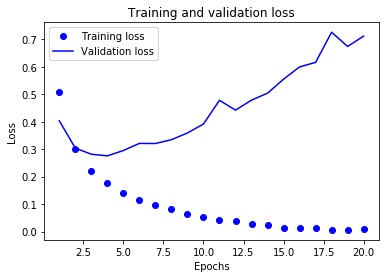

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

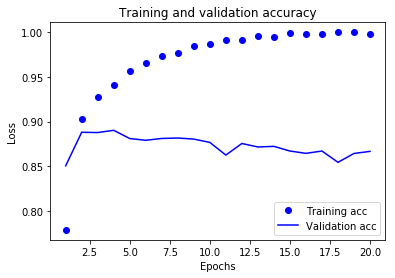

In [24]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.4559 - accuracy: 0.8290
Epoch 2/4
25000/25000 [==============================] - 13s 507us/sample - loss: 0.2669 - accuracy: 0.9074
Epoch 3/4
25000/25000 [==============================] - 11s 457us/sample - loss: 0.2067 - accuracy: 0.9262
Epoch 4/4
25000/25000 [==============================] - 4s 164us/sample - loss: 0.1721 - accuracy: 0.9380


25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [26]:
results = model.predict(x_test)
results
#greater than 0.5 =positive review
#less than 0.5 =negative review

array([[0.24675465],
       [0.99998194],
       [0.89126873],
       ...,
       [0.11652634],
       [0.11750177],
       [0.6983155 ]], dtype=float32)

In [ ]:
#3.5 Classifying newswires: do it yourself
#Another example of bbc_news